### Portfolio of Oil Exploration Assets: Learning Options, Sequential Drilling Options and Defer Options 
####  Marco Antonio Guimarães Dias, 
#### Luigi de Magalhães Detomi Calvette
##### RO Congress - Boston 2017


[Paper](http://www.realoptions.org/openconf2017/data/papers/57.pdf)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import itertools
import time

In [2]:
###Dados de Entrada###
r=np.log(1+0.04)
#print(r)
delta=np.log(1+0.05)
sigma=0.2
tau=3
Po=50


In [3]:
#Importar Case 2 ou ABC ou ABCD como case 
case=pd.read_csv("Case_AB.csv", sep=';')
case.set_index('Type', inplace=True)
case=case.astype(float).T
case

Type,S,I
CF,0.3,0.25
I_w,70.0,60.00
P,50.0,50.00
q,0.1,0.11
B,500.0,600.00
I_d,2300.0,3100.00


In [4]:
#Importar correlacao Case 2 ou ABC ou ABCD como case
case_corr=pd.read_csv("Case_AB_corr.csv", sep=';')
case_corr.set_index('Type', inplace=True)
case_corr


,S,I
Type,,
S,1.0,0.5
I,0.5,1.0


In [5]:
#Importar Case 2 
case_2=pd.read_csv("Case_2.csv", sep=';')
case_2.set_index('Type', inplace=True)
case_2=case_2.astype(float).T
case_2

Type,Safe,Risky
CF,0.5,0.30
I_w,70.0,45.00
P,50.0,50.00
q,0.1,0.12
B,600.0,500.00
I_d,2900.0,2800.00


In [6]:
#Importar correlacao Case 2 
case_2_corr=pd.read_csv("Case_2_corr.csv", sep=';')
case_2_corr.set_index('Type', inplace=True)
case_2_corr


,A,B
Type,,
A,1.00,0.65
B,0.65,1.00


In [7]:
#Importar Case ABC 
case_ABC=pd.read_csv("Case_ABC.csv", sep=';')
case_ABC.set_index('Type', inplace=True)
case_ABC=case_ABC.astype(float).T
case_ABC

Type,S,I,R
CF,0.3,0.25,0.20
I_w,70.0,60.00,50.00
P,50.0,50.00,50.00
q,0.1,0.11,0.12
B,500.0,600.00,700.00
I_d,2300.0,3100.00,4000.00


In [8]:
#Importar correlacao Case ABC 
case_ABC_corr=pd.read_csv("Case_ABC_corr.csv", sep=';')
case_ABC_corr.set_index('Type', inplace=True)
case_ABC_corr


,S,I,R
Type,,,
S,1.0,0.5,0.5
I,0.5,1.0,0.6
R,0.5,0.6,1.0


In [9]:
#Importar Case ABCD 
case_ABCD=pd.read_csv("Case_ABCD.csv", sep=';')
case_ABCD.set_index('Type', inplace=True)
case_ABCD=case_ABCD.astype(float).T
case_ABCD

Type,S,I,R,W
CF,0.3,0.25,0.20,0.20
I_w,70.0,60.00,50.00,55.00
P,50.0,50.00,50.00,50.00
q,0.1,0.11,0.12,0.13
B,500.0,600.00,700.00,750.00
I_d,2300.0,3100.00,4000.00,4500.00


In [10]:
#Importar correlacao Case ABCD 
case_ABCD_corr=pd.read_csv("Case_ABCD_corr.csv", sep=';')
case_ABCD_corr.set_index('Type', inplace=True)
case_ABCD_corr


,S,I,R,W
Type,,,,
S,1.0,0.5,0.5,0.5
I,0.5,1.0,0.6,0.5
R,0.5,0.6,1.0,0.5
W,0.5,0.5,0.5,1.0


In [11]:
def V(P,case,w):
    valor=P*case.iloc[3,k[w]]*case.iloc[4,k[w]]
    return valor

    
    

In [12]:
def I(P,case,w):
    invest=(P/50)*case.iloc[5,k[w]]
    return invest

In [13]:
#################Formalizacao caso - correto
fold=[]
seq=[]
P=50
n=case.shape[1]
perm=itertools.permutations(range(n))
for k in list(perm):
    seq.append(k)
    #print(k)
    m=np.zeros((2**(n-1),n))
    p=np.zeros((2**(n-1),n))
    pi=np.zeros((2**(n-1),n))
    m[m==0]=np.nan
    p[m==0]=np.nan
    pi[pi==0]=np.nan
    
    
    m[0,0]=case.iloc[0,k[0]] ### Capta da permutacao, o fc da Primeira na ordem de perfuracao
    pi[0,0]=m[0,0]*(V(P,case,0) - I(P,case,0)) -case.iloc[1,k[0]]
    
    #Vetores Auxiliares
    Ax_m=[]
    Ax1_m=[]
    Ax_pi=[]
    Ax_lim=[]
    ##Loop para criacao da matriz de FC e VME
    for y in range(1,n,1):
        Ax_m.append(case.iloc[0,k[y]])
    
    
    for j in range(n-1):
        p=0
        for q in range(1+j,n,1):
            for i in range(2**(j)):
                p=p+1
                #print(p-1,j,q,i,j)
                CF_s=Ax_m[p-1] +case_corr.iloc[k[j],k[q]]*np.sqrt((m[i,j]-m[i,j]**2)*(Ax_m[p-1]-Ax_m[p-1]**2))/m[i,j]
                Ax1_m.append(CF_s)
                CF_ins=Ax_m[p-1] -case_corr.iloc[k[j],k[q]]*np.sqrt((m[i,j]-m[i,j]**2)*(Ax_m[p-1]-Ax_m[p-1]**2))/(1-m[i,j])
                Ax1_m.append(CF_ins)
                
                Ax_pi.append(CF_s*(V(P,case,j+1) - I(P,case,j+1)) -case.iloc[1,k[j+1]])
                Ax_pi.append(CF_ins*(V(P,case,j+1) - I(P,case,j+1)) -case.iloc[1,k[j+1]])
                
                a=np.minimum(Ax_m[p-1],m[i,j])*(1-np.maximum(Ax_m[p-1],m[i,j]))
                b=np.maximum(Ax_m[p-1],m[i,j])*(1-np.minimum(Ax_m[p-1],m[i,j]))
                Ax_lim.append(np.sqrt(a/b)>case_corr.iloc[k[j],k[q]])
                
                a=-np.sqrt(Ax_m[p-1]*m[i,j]/(1-Ax_m[p-1])*(1-m[i,j]))
                b=-np.sqrt((1-Ax_m[p-1])*(1-m[i,j])/Ax_m[p-1]*m[i,j])
                Ax_lim.append(np.maximum(a,b)<case_corr.iloc[k[j],k[q]])
                

        m[0:2*(i+1),j+1]=Ax1_m[0:2*(i+1)]
        pi[0:2*(i+1),j+1]=Ax_pi[0:2*(i+1)]
        
        del Ax1_m[0:2*(i+1)]
        
        #print(Ax_lim)
        Ax_m=Ax1_m
        Ax1_m=[]
        Ax_pi=[]
        Ax_lim=[]
    
   # print(100*m)
    #print(pi)
    
    for l in np.arange(n-2,-1,-1):
        #print(l)
        for g in range(2**(l)):
            #print(pi[g,l],m[g,l], pi[2*g,l+1],(1-m[g,l]), pi[2*g+1,l+1]   )
            pi[g,l]= np.maximum(0,pi[g,l] + m[g,l]*np.maximum(0,pi[2*g,l+1]) + (1-m[g,l])*np.maximum(0,pi[2*g+1,l+1]))
    #print(pi)
    fold.append(pi[0,0])
    

###Fornece o melhor portfolio seq_winner e o valor do porfolio winner
winner=np.amax(fold)
Seq_winner=seq[np.argmax(fold)]
winner=np.maximum(0,winner)
if winner==0:
    Seq_winner='W'

    
    
            

    #print(fold)
    #print(m)
print('melhor portfolio é:',Seq_winner, 'e o valor é:', winner, fold)
#print(fold)
    
    
    
    
    
    

melhor portfolio é: (1, 0) e o valor é: 7.343134832984433 [6.843134832984429, 7.343134832984433]


In [83]:
def carteira(case,case_corr,P):
    #################Formalizacao caso 4 - correto
    fold=[]
    seq=[]
    #P=50
    n=case.shape[1]
    perm=itertools.permutations(range(n))
    for k in list(perm):
        seq.append(k)
        #print(k)
        m=np.zeros((2**(n-1),n))
        p=np.zeros((2**(n-1),n))
        pi=np.zeros((2**(n-1),n))
        m[m==0]=np.nan
        p[m==0]=np.nan
        pi[pi==0]=np.nan


        m[0,0]=case.iloc[0,k[0]] ### Capta da permutacao, o fc da Primeira na ordem de perfuracao
        pi[0,0]=m[0,0]*(P*case.iloc[3,k[0]]*case.iloc[4,k[0]] - (P/50)*case.iloc[5,k[0]]) -case.iloc[1,k[0]]

        #Vetores Auxiliares
        Ax_m=[]
        Ax1_m=[]
        Ax_pi=[]
        ##Loop para criacao da matriz de FC e VME
        for y in range(1,n,1):
            Ax_m.append(case.iloc[0,k[y]])


        for j in range(n-1):
            p=0
            for q in range(1+j,n,1):
                for i in range(2**(j)):
                    p=p+1
                    #print(p-1,j,q,i,j)
                    CF_s=Ax_m[p-1] +case_corr.iloc[k[j],k[q]]*np.sqrt((m[i,j]-m[i,j]**2)*(Ax_m[p-1]-Ax_m[p-1]**2))/m[i,j]
                    Ax1_m.append(CF_s)
                    CF_ins=Ax_m[p-1] -case_corr.iloc[k[j],k[q]]*np.sqrt((m[i,j]-m[i,j]**2)*(Ax_m[p-1]-Ax_m[p-1]**2))/(1-m[i,j])
                    Ax1_m.append(CF_ins)

                    Ax_pi.append(CF_s*(P*case.iloc[3,k[j+1]]*case.iloc[4,k[j+1]] - (P/50)*case.iloc[5,k[j+1]]) -case.iloc[1,k[j+1]])
                    Ax_pi.append(CF_ins*(P*case.iloc[3,k[j+1]]*case.iloc[4,k[j+1]] - (P/50)*case.iloc[5,k[j+1]]) -case.iloc[1,k[j+1]])


            m[0:2*(i+1),j+1]=Ax1_m[0:2*(i+1)]
            pi[0:2*(i+1),j+1]=Ax_pi[0:2*(i+1)]

            del Ax1_m[0:2*(i+1)]

            Ax_m=Ax1_m
            Ax1_m=[]
            Ax_pi=[]

        #print(100*m)
        #print(pi)

        for l in np.arange(n-2,-1,-1):
            #print(l)
            for g in range(2**(l)):
                #print(pi[g,l],m[g,l], pi[2*g,l+1],(1-m[g,l]), pi[2*g+1,l+1]   )
                pi[g,l]= np.maximum(0,pi[g,l] + m[g,l]*np.maximum(0,pi[2*g,l+1]) + (1-m[g,l])*np.maximum(0,pi[2*g+1,l+1]))
        #print(pi)
        fold.append(pi[0,0])


    ###Fornece o melhor portfolio seq_winner e o valor do porfolio winner
    winner=np.amax(fold)
    Seq_winner=seq[np.argmax(fold)]
    winner=np.maximum(0,winner)
    if winner==0:
        Seq_winner='W'





        #print(fold)
        #print(m)
    #print('melhor portfolio é:',Seq_winner, 'e o valor é:', winner, fold)
    #print(fold)
    return[Seq_winner,winner,fold]







In [84]:
def carteira(case,case_corr,P):
    #################Formalizacao caso 4 - correto
    fold=[]
    seq=[]
    #P=50
    n=case.shape[1]
    perm=itertools.permutations(range(n))
    for k in list(perm):
        seq.append(k)
        #print(k)
        m=np.zeros((2**(n-1),n))
        p=np.zeros((2**(n-1),n))
        pi=np.zeros((2**(n-1),n))
        m[m==0]=np.nan
        p[m==0]=np.nan
        pi[pi==0]=np.nan


        m[0,0]=case.iloc[0,k[0]] ### Capta da permutacao, o fc da Primeira na ordem de perfuracao
        pi[0,0]=m[0,0]*(P*case.iloc[3,k[0]]*case.iloc[4,k[0]] - (P/50)*case.iloc[5,k[0]]) -case.iloc[1,k[0]]
        #Vetores Auxiliares
        Ax_m=[]
        Ax1_m=[]
        Ax_pi=[]
        ##Loop para criacao da matriz de FC e VME
        for y in range(1,n,1):
            Ax_m.append(case.iloc[0,k[y]])


        for j in range(n-1):
            p=0
            for q in range(1+j,n,1):
                for i in range(2**(j)):
                    p=p+1
                    #print(p-1,j,q,i,j)
                    CF_s=Ax_m[p-1] +case_corr.iloc[k[j],k[q]]*np.sqrt((m[i,j]-m[i,j]**2)*(Ax_m[p-1]-Ax_m[p-1]**2))/m[i,j]
                    Ax1_m.append(CF_s)
                    CF_ins=Ax_m[p-1] -case_corr.iloc[k[j],k[q]]*np.sqrt((m[i,j]-m[i,j]**2)*(Ax_m[p-1]-Ax_m[p-1]**2))/(1-m[i,j])
                    Ax1_m.append(CF_ins)

                    Ax_pi.append(CF_s*(P*case.iloc[3,k[j+1]]*case.iloc[4,k[j+1]] - (P/50)*case.iloc[5,k[j+1]]) -case.iloc[1,k[j+1]])
                    Ax_pi.append(CF_ins*(P*case.iloc[3,k[j+1]]*case.iloc[4,k[j+1]] - (P/50)*case.iloc[5,k[j+1]]) -case.iloc[1,k[j+1]])



            m[0:2*(i+1),j+1]=Ax1_m[0:2*(i+1)]
            pi[0:2*(i+1),j+1]=Ax_pi[0:2*(i+1)]

            del Ax1_m[0:2*(i+1)]

            Ax_m=Ax1_m
            Ax1_m=[]
            Ax_pi=[]

        #print(100*m)
        #print(pi)

        for l in np.arange(n-2,-1,-1):
            #print(l)
            for g in range(2**(l)):
                #print(pi[g,l],m[g,l], pi[2*g,l+1],(1-m[g,l]), pi[2*g+1,l+1]   )
                pi[g,l]= np.maximum(0,pi[g,l] + m[g,l]*np.maximum(0,pi[2*g,l+1]) + (1-m[g,l])*np.maximum(0,pi[2*g+1,l+1]))
        #print(pi)
        fold.append(pi[0,0])


    ###Fornece o melhor portfolio seq_winner e o valor do porfolio winner
    winner=np.amax(fold)
    Seq_winner=seq[np.argmax(fold)]
    winner=np.maximum(0,winner)
    if winner==0:
        Seq_winner='W'
    
    
    seq_sec=list(seq)
    num=np.argmax(fold)
    fold_sec=list(fold)
    fold_sec.remove(np.amax(fold))
    del seq_sec[num]
    
    second=np.amax(fold_sec)
    Seq_sec=seq_sec[np.argmax(fold_sec)]
    second=np.maximum(0,second)
    if second==0:
        Seq_sec='W'
    diff=winner-second



        #print(fold)
        #print(m)
    #print('melhor portfolio é:',Seq_winner, 'e o valor é:', winner, fold)
    #print(fold)
    return[Seq_winner,winner,Seq_sec, second, diff,fold]







In [15]:
cart=carteira(case_2,case_2_corr,50)

In [16]:
type(carteira(case_2,case_2_corr,50)[0])

tuple

In [17]:
for i in [30,60,75]:
    print(carteira(case_2,case_2_corr,i)[0])

W
(1, 0)
(0, 1)


In [18]:
a=np.array([[cart[0],2],[4,5]])

In [19]:
np.zeros((3,3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [31]:
def diffinexpcart(case,case_corr,P,r,div,sigma,tau):
    #############################################################
    #######Método por diferenças finitas explícitas##############
    accur=0.02  #Porcentagem de acurácia
    
    #####Solução por diferenças finita explícitas###
    #Precisão em e intervalo da célula em V
    deltaP=P*accur
    
    # M são as divisões do grid em V
    #Perpetuidade vcritico não esta na programacao
    #M= int(1.1*vcritico(I,r,div,sigma,tau)[2]/deltaV) # Max é 10% acima do gatilho em perpetuidade. Vcrit- com gati precisa de tau
    Pmax=4*P
    M=int(Pmax/deltaP)
    PGrid=int(P/deltaP) #Ponto do grid onde esta P_0. 
    
    #deltat= (deltaP**2)/((sigma**2)*((3*I)**2)) #Convergência: Critério do peso central >=0. Pmax=3I ><1.1Gatilho_perp
    deltat= (deltaP**2)/((sigma**2)*(Pmax**2))
    N= int(tau/deltat) +1
    
    df=1/(1+(r*deltat)) # fator de desconto
    
    
    #Vetor Pt
    Pt=np.zeros(M+1)
    Gatilho=np.zeros((N+1,M+1), dtype=object)
    F=np.zeros((N+1,M+1))
    deltat=tau/N
    for i in range(M+1):
        Pt[i]= i*deltaP
        solution=carteira(case,case_ABC_corr,Pt[i])
        F[N,i]=solution[1]
        #print(solution[0])
        Gatilho[N,i]=solution[0]
        #F[N,i]=np.maximum(0,Pt[i]-I)
    #Gatilho[N]=I
    
    ##############Loop################
    for j in range(N-1,-1,-1): #de N-1 até zero(-1) pulando em -1
        for i in range(1,M,1): # de 1 até M-1 pulando em 1
            pu= 0.5*((sigma**2)*(i**2) + ((r - div)*i))*deltat
            pm = 1 - (sigma**2)*(i**2)*deltat
            pdown = 0.5*((sigma**2)*(i**2) - ((r - div)*i))*deltat
            F[j,i]= df*(pu*F[j+1,i+1] + pm*F[j+1,i] + pdown*F[j+1,i - 1])
            
            ###Vetor Gatilho####
            #if F[j,i]< Vt[i]-I and F[j,i-1]>Pt[i-1]-I:
            #    Gatilho[j]=(Pt[i]+Vt[i-1])/2
            
            solution=carteira(case,case_corr,Pt[i])
            if F[j,i]>=solution[1]: #opcao americana e gatilho
                Gatilho[j,i]='W'
            else:
                Gatilho[j,i]=solution[0]
                F[j,i]=solution[1]
        
        
        F[j,0]=0
        Gatilho[j,0]='W'
        solution=carteira(case,case_corr,Pt[i])
        F[j,M]=solution[1]
        Gatilho[j,M]=solution[0]
        
    T=np.linspace(0,tau,num=N+1)
    
    ###############Dataframe do Gatilho##############
    #print(Gatilho.shape[0])
    dframe=pd.DataFrame(list(range(Gatilho.shape[0])))
    dframe.columns=['Time']
    dframe= dframe.set_index('Time')

    for i in range(Gatilho.shape[0]):
        check=Gatilho[i,0]
        for j in range(Gatilho.shape[1]):
            if check == Gatilho[i,j]:
                check=check
            else:
                #print(i,j,'{}'.format(check),Gatilho[i,j],j)
                dframe.loc[i,'{}'.format(Gatilho[i,j])]=Pt[j]
                check=Gatilho[i,j]
    dframe.index=T
    
    ###Retorna A opção hoje, Gatilho, Tempo, Vt, Matrix para Gráficos
    return[F[0,PGrid],dframe,T,Pt,F,Gatilho]



In [22]:
start=time.time()
solucao=diffinexpcart(case_2,case_2_corr,50,r,delta,sigma,tau)
cpu=time.time()-start
print('minutos-',cpu/60)


minutos- 6.568458898862203


In [32]:
start=time.time()
solucao=diffinexpcart(case_ABC,case_ABC_corr,50,r,delta,sigma,tau)
cpu=time.time()-start
print('minutos-',cpu/60)


minutos- 44.59758840004603


In [33]:
solucao[0]

27.704676493473173

In [34]:
solucao[1]

,"(0, 1, 2)",W,"(1, 0, 2)","(1, 2, 0)","(2, 1, 0)","(0, 2, 1)"
0.000000,83.0,91.0,101.0,NaN,NaN,NaN
0.000625,83.0,91.0,101.0,NaN,NaN,NaN
0.001250,83.0,91.0,101.0,NaN,NaN,NaN
0.001875,83.0,91.0,101.0,NaN,NaN,NaN
0.002499,83.0,91.0,101.0,NaN,NaN,NaN
...,...,...,...,...,...,...
2.997501,83.0,95.0,98.0,57.0,39.0,94.0
2.998125,83.0,95.0,98.0,57.0,39.0,94.0
2.998750,83.0,95.0,97.0,57.0,39.0,94.0
2.999375,83.0,95.0,97.0,57.0,39.0,94.0


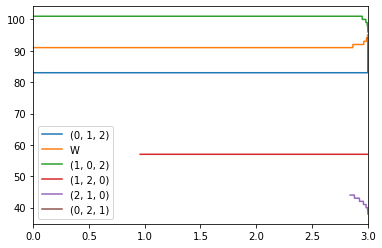

In [35]:
solucao[1].plot()

In [36]:
################################################33
###########Modelo de Competicao#################


In [37]:
#Importar Case 2 ou ABC ou ABCD como case 
case=pd.read_csv("Case_estr_ABC.csv", sep=';')
case.set_index('Type', inplace=True)
case.Owner=case.Owner.astype(int)
case=case.astype(float).T
case

Type,S,I,R
CF,0.3,0.25,0.20
I_w,70.0,60.00,50.00
P,50.0,50.00,50.00
q,0.1,0.11,0.12
B,500.0,600.00,700.00
I_d,2300.0,3100.00,4000.00
Owner,1.0,1.00,0.00


In [38]:
#Importar correlacao Case 2 ou ABC ou ABCD como case
case_corr=pd.read_csv("Case_estr_ABC_corr.csv", sep=';')
case_corr.set_index('Type', inplace=True)
case_corr


,S,I,R
Type,,,
S,1.0,0.5,0.5
I,0.5,1.0,0.6
R,0.5,0.6,1.0


In [39]:
ima=solucao[5]

In [40]:
w, h = ima.shape[0], ima.shape[1]
data = np.zeros((h,w, 3), dtype=np.uint8)
d1=np.zeros((h,w))
for i in range(ima.shape[0]):
    for j in range(ima.shape[1]):
        #print(j)
        if ima[i,j]=='W':
            data[ima.shape[1]-j-1,i]=[0,0,0]
            d1[ima.shape[1]-j-1,i]=0
        elif ima[i,j]==(0,1,2):
            data[ima.shape[1]-j-1,i]=[255,0,0]
            d1[ima.shape[1]-j-1,i]=1
        elif ima[i,j]==(0,2,1):
            data[ima.shape[1]-j-1,i]=[255,100,0]
            d1[ima.shape[1]-j-1,i]=2
        elif ima[i,j]==(1,0,2):
            data[ima.shape[1]-j-1,i]=[255,0,0]
            d1[ima.shape[1]-j-1,i]=3
        elif ima[i,j]==(1,2,0):
            data[ima.shape[1]-j-1,i]=[255,255,0]
            d1[ima.shape[1]-j-1,i]=4
        elif ima[i,j]==(2,1,0):
            data[ima.shape[1]-j-1,i]=[0,0,255]
            d1[ima.shape[1]-j-1,i]=5
        elif ima[i,j]==(2,0,1):
            data[ima.shape[1]-j-1,i]=[100,0,255]
            d1[ima.shape[1]-j-1,i]=6
        
        

In [41]:
d1frame=pd.DataFrame(d1)
d1frame.columns=solucao[2]
d1frame.index=solucao[3][::-1]

In [51]:
d1frame.head()

,0.000000,0.000625,0.001250,0.001875,0.002499,0.003124,0.003749,0.004374,0.004999,0.005624,...,2.994376,2.995001,2.995626,2.996251,2.996876,2.997501,2.998125,2.998750,2.999375,3.000000
200.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
199.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
198.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
197.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
196.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0


In [67]:
d1frame[d1frame.index <65]

,0.000000,0.000625,0.001250,0.001875,0.002499,0.003124,0.003749,0.004374,0.004999,0.005624,...,2.994376,2.995001,2.995626,2.996251,2.996876,2.997501,2.998125,2.998750,2.999375,3.000000
64.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
63.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
62.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
61.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [105]:
(d1frame.index<65) & (d1frame.index>35)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

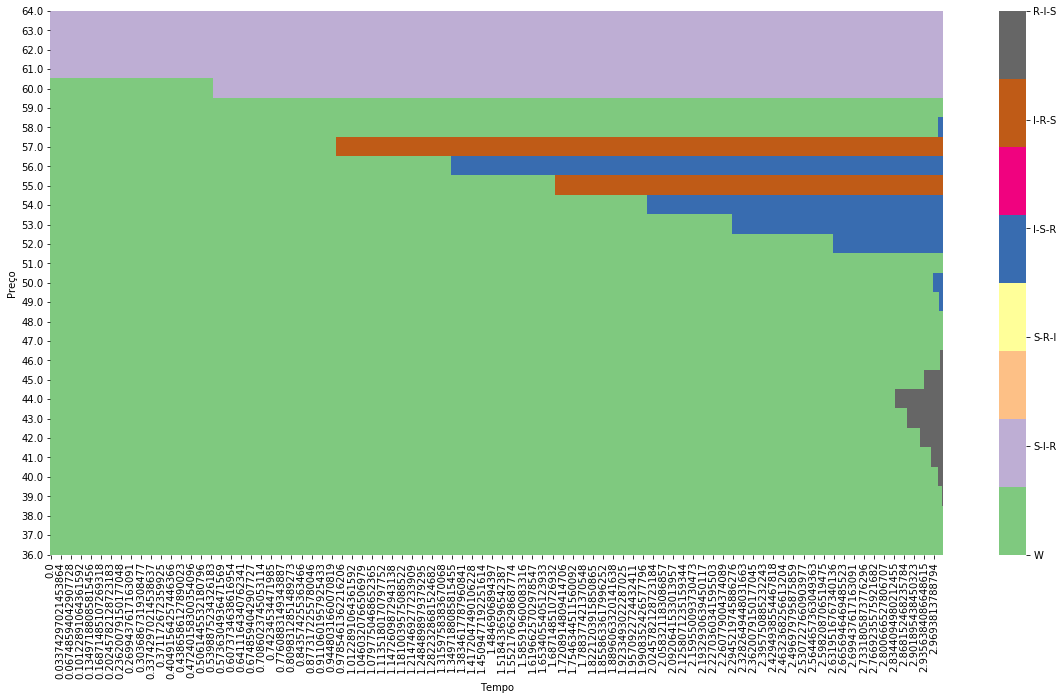

In [107]:

fig, ax=plt.subplots(figsize=(20,10))
#cbar_ax=fig.add_axes([0,1,2,3,4,5,6])
ax=sns.heatmap(d1frame[(d1frame.index<65) & (d1frame.index>35)], cmap="Accent")
#ax.locator_params(axis='x', nbins=4)
#ax.locator_params(axis='y',nbins=4)

colorbar = ax.collections[0].colorbar
#colorbar.set_ticks([3/8,1,2,4*3/4 +3/8,5*3/4 +3/8,6*3/4 +3/8,6 - 3/8])
#colorbar.set_ticklabels(['W', '0-1-2', '0-2-1','1-0-2','1-2-0','2-1-0','2-0-1'])
colorbar.set_ticks([0,1,2,3,4,5])
colorbar.set_ticklabels(['W', 'S-I-R', 'S-R-I','I-S-R','I-R-S','R-I-S'])


# X - Y axis labels
ax.set_ylabel('Preço');
ax.set_xlabel('Tempo');

# Only y-axis labels need their rotation set, x-axis labels already have a rotation of 0
_, labels = plt.yticks();
plt.setp(labels, rotation=0);

#ax.set(xticklabels=solucao[2]);



In [92]:
for i in np.arange(0,200,1):
    print(i, carteira(case,case_corr,i)[0],carteira(case,case_corr,i)[1],carteira(case,case_corr,i)[3],carteira(case,case_corr,i)[2], carteira(case,case_corr,i)[4] )

0 W 0.0 0.0 W 0.0
1 W 0.0 0.0 W 0.0
2 W 0.0 0.0 W 0.0
3 W 0.0 0.0 W 0.0
4 W 0.0 0.0 W 0.0
5 W 0.0 0.0 W 0.0
6 W 0.0 0.0 W 0.0
7 W 0.0 0.0 W 0.0
8 W 0.0 0.0 W 0.0
9 W 0.0 0.0 W 0.0
10 W 0.0 0.0 W 0.0
11 W 0.0 0.0 W 0.0
12 W 0.0 0.0 W 0.0
13 W 0.0 0.0 W 0.0
14 W 0.0 0.0 W 0.0
15 W 0.0 0.0 W 0.0
16 W 0.0 0.0 W 0.0
17 W 0.0 0.0 W 0.0
18 W 0.0 0.0 W 0.0
19 W 0.0 0.0 W 0.0
20 W 0.0 0.0 W 0.0
21 W 0.0 0.0 W 0.0
22 W 0.0 0.0 W 0.0
23 W 0.0 0.0 W 0.0
24 W 0.0 0.0 W 0.0
25 W 0.0 0.0 W 0.0
26 W 0.0 0.0 W 0.0
27 W 0.0 0.0 W 0.0
28 W 0.0 0.0 W 0.0
29 W 0.0 0.0 W 0.0
30 W 0.0 0.0 W 0.0
31 W 0.0 0.0 W 0.0
32 W 0.0 0.0 W 0.0
33 W 0.0 0.0 W 0.0
34 W 0.0 0.0 W 0.0
35 W 0.0 0.0 W 0.0
36 W 0.0 0.0 W 0.0
37 W 0.0 0.0 W 0.0
38 (2, 1, 0) 1.5023762278006423 0.847333477693855 (2, 0, 1) 0.6550427501067873
39 (2, 1, 0) 3.4570338493688872 2.8696317271069454 (2, 0, 1) 0.5874021222619419
40 (2, 1, 0) 5.4116914709370185 4.891929976519908 (2, 0, 1) 0.5197614944171107
41 (2, 1, 0) 7.366349092505242 6.91422822593298 (2

145 (1, 0, 2) 283.4811037916533 280.39735268470224 (0, 1, 2) 3.0837511069510697
146 (1, 0, 2) 286.4622784129188 283.35726005695426 (0, 1, 2) 3.105018355964546
147 (1, 0, 2) 289.44345303418413 286.31716742920617 (0, 1, 2) 3.1262856049779657
148 (1, 0, 2) 292.424627655448 289.2770748014565 (0, 1, 2) 3.147552853991499
149 (1, 0, 2) 295.4058022767132 292.23698217370827 (0, 1, 2) 3.1688201030049186
150 (1, 0, 2) 298.386976897978 295.19688954595966 (0, 1, 2) 3.190087352018338
151 (1, 0, 2) 301.36815151924327 298.1567969182114 (0, 1, 2) 3.2113546010318714
152 (1, 0, 2) 304.34932614050774 301.11670429046245 (0, 1, 2) 3.232621850045291
153 (1, 0, 2) 307.3305007617731 304.0766116627144 (0, 1, 2) 3.2538890990587106
154 (1, 0, 2) 310.3116753830376 307.03651903496535 (0, 1, 2) 3.275156348072244
155 (1, 0, 2) 313.2928500043021 309.9964264072164 (0, 1, 2) 3.2964235970857203
156 (1, 0, 2) 316.2740246255676 312.95633377946854 (0, 1, 2) 3.317690846099083
157 (1, 0, 2) 319.2551992468325 315.9162411517199

In [91]:
solucao[3]

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

In [ ]:
#############################################

In [242]:
#################Formalizacao caso - com competição   

####Separação do ativo do vizinho -Caso bem particular onde há um só ativo e 
sinal=2  #sinal up igual a 1 e sinal down igual a 0
stra_rho=[]
stra_rho.append(case_corr[case.columns[case.loc['Owner']==0]].iloc[0,0])
stra_rho.append(case_corr[case.columns[case.loc['Owner']==0]].iloc[1,0])

FC_viz=case[case.columns[case.loc['Owner']==0]].iloc[0,0]

case_corr=case_corr.drop(case_corr[case.columns[case.loc['Owner']==0]])
case_corr=case_corr.drop(case_corr[case.columns[case.loc['Owner']==0]],axis=1)


case=case.drop(case[case.columns[case.loc['Owner']==0]],axis=1)




                         
                         
fold=[]
seq=[]
P=50
n=case.shape[1]
perm=itertools.permutations(range(n))
for k in list(perm):
    seq.append(k)
    #print(k)
    m=np.zeros((2**(n-1),n))
    p=np.zeros((2**(n-1),n))
    pi=np.zeros((2**(n-1),n))
    m[m==0]=np.nan
    p[m==0]=np.nan
    pi[pi==0]=np.nan
    
                         
    #m[0,0]=case.iloc[0,k[0]] ### Capta da permutacao, o fc da Primeira na ordem de perfuracao
    #pi[0,0]=m[0,0]*(V(P,case,0) - I(P,case,0)) -case.iloc[1,k[0]]
    
    if sinal==1:
        
        m[0,0]=case.iloc[0,k[0]] + stra_rho[k[0]]*np.sqrt(FC_viz*(1-FC_viz)*case.iloc[0,k[0]]*(1-case.iloc[0,k[0]]))/FC_viz 
        pi[0,0]=m[0,0]*(V(P,case,0) - I(P,case,0)) -case.iloc[1,k[0]]
        #print(1,m[0,0],pi[0,0])
    
    elif sinal==0:
        print(0)
        m[0,0]=case.iloc[0,k[0]] - stra_rho[k[0]]*np.sqrt(FC_viz*(1-FC_viz)*case.iloc[0,k[0]]*(1-case.iloc[0,k[0]]))/(1-FC_viz) 
        pi[0,0]=m[0,0]*(V(P,case,0) - I(P,case,0)) -case.iloc[1,k[0]]
        #print(0,m[0,0],pi[0,0])
                         
    else:
        print(2)
        m[0,0]=case.iloc[0,k[0]] ### Capta da permutacao, o fc da Primeira na ordem de perfuracao
        pi[0,0]=m[0,0]*(V(P,case,0) - I(P,case,0)) -case.iloc[1,k[0]]
        #print(2,m[0,0],pi[0,0])
        
    
    
                         
                         
    #Vetores Auxiliares
    Ax_m=[]
    Ax1_m=[]
    Ax_pi=[]
    Ax_lim=[]
    ##Loop para criacao da matriz de FC e VME
    for y in range(1,n,1):
        Ax_m.append(case.iloc[0,k[y]])
    
    
    for j in range(n-1):
        p=0
        for q in range(1+j,n,1):
            for i in range(2**(j)):
                p=p+1
                #print(p-1,j,q,i,j)
                CF_s=Ax_m[p-1] +case_corr.iloc[k[j],k[q]]*np.sqrt((m[i,j]-m[i,j]**2)*(Ax_m[p-1]-Ax_m[p-1]**2))/m[i,j]
                Ax1_m.append(CF_s)
                CF_ins=Ax_m[p-1] -case_corr.iloc[k[j],k[q]]*np.sqrt((m[i,j]-m[i,j]**2)*(Ax_m[p-1]-Ax_m[p-1]**2))/(1-m[i,j])
                Ax1_m.append(CF_ins)
                
                Ax_pi.append(CF_s*(V(P,case,j+1) - I(P,case,j+1)) -case.iloc[1,k[j+1]])
                Ax_pi.append(CF_ins*(V(P,case,j+1) - I(P,case,j+1)) -case.iloc[1,k[j+1]])
                
                a=np.minimum(Ax_m[p-1],m[i,j])*(1-np.maximum(Ax_m[p-1],m[i,j]))
                b=np.maximum(Ax_m[p-1],m[i,j])*(1-np.minimum(Ax_m[p-1],m[i,j]))
                Ax_lim.append(np.sqrt(a/b)>case_corr.iloc[k[j],k[q]])
                
                a=-np.sqrt(Ax_m[p-1]*m[i,j]/(1-Ax_m[p-1])*(1-m[i,j]))
                b=-np.sqrt((1-Ax_m[p-1])*(1-m[i,j])/Ax_m[p-1]*m[i,j])
                Ax_lim.append(np.maximum(a,b)<case_corr.iloc[k[j],k[q]])
                

        m[0:2*(i+1),j+1]=Ax1_m[0:2*(i+1)]
        pi[0:2*(i+1),j+1]=Ax_pi[0:2*(i+1)]
        
        del Ax1_m[0:2*(i+1)]
        
        #print(Ax_lim)
        Ax_m=Ax1_m
        Ax1_m=[]
        Ax_pi=[]
        Ax_lim=[]
    
   # print(100*m)
    #print(pi)
    
    for l in np.arange(n-2,-1,-1):
        #print(l)
        for g in range(2**(l)):
            #print(pi[g,l],m[g,l], pi[2*g,l+1],(1-m[g,l]), pi[2*g+1,l+1]   )
            pi[g,l]= np.maximum(0,pi[g,l] + m[g,l]*np.maximum(0,pi[2*g,l+1]) + (1-m[g,l])*np.maximum(0,pi[2*g+1,l+1]))
    #print(pi)
    fold.append(pi[0,0])
    

###Fornece o melhor portfolio seq_winner e o valor do porfolio winner
winner=np.amax(fold)
Seq_winner=seq[np.argmax(fold)]
winner=np.maximum(0,winner)
if winner==0:
    Seq_winner='W'

    
    
            

    #print(fold)
    #print(m)
print('melhor portfolio é:',Seq_winner, 'e o valor é:', winner, fold)
#print(fold)
    
    
    
    
    
    

2
2
melhor portfolio é: (1, 0) e o valor é: 7.343134832984433 [6.843134832984429, 7.343134832984433]


In [197]:
print('up: melhor portfolio é: (1, 0) e o valor é: 105.52316521446231 [92.60790195949767, 105.52316521446231]')

up: melhor portfolio é: (1, 0) e o valor é: 105.52316521446231 [92.60790195949767, 105.52316521446231]


In [202]:
print('down: melhor portfolio é: W e o valor é: 0.0 [0.0, 0.0]')

down: melhor portfolio é: W e o valor é: 0.0 [0.0, 0.0]


In [207]:
print('01: melhor portfolio é: (1, 0) e o valor é: 7.343134832984433 [6.843134832984429, 7.343134832984433]')

01: melhor portfolio é: (1, 0) e o valor é: 7.343134832984433 [6.843134832984429, 7.343134832984433]


In [280]:
def carteira_estra(case,case_corr,P,sinal):
    #################Formalizacao caso 4 - correto
    
    #sinal=2  #sinal up igual a 1 e sinal down igual a 0
    stra_rho=[]
    stra_rho.append(case_corr[case.columns[case.loc['Owner']==0]].iloc[0,0])
    stra_rho.append(case_corr[case.columns[case.loc['Owner']==0]].iloc[1,0])

    FC_viz=case[case.columns[case.loc['Owner']==0]].iloc[0,0]

    case_corr=case_corr.drop(case_corr[case.columns[case.loc['Owner']==0]])
    case_corr=case_corr.drop(case_corr[case.columns[case.loc['Owner']==0]],axis=1)


    case=case.drop(case[case.columns[case.loc['Owner']==0]],axis=1)

    
    
    
    fold=[]
    seq=[]
    #P=50
    n=case.shape[1]
    perm=itertools.permutations(range(n))
    for k in list(perm):
        seq.append(k)
        #print(k)
        m=np.zeros((2**(n-1),n))
        p=np.zeros((2**(n-1),n))
        pi=np.zeros((2**(n-1),n))
        m[m==0]=np.nan
        p[m==0]=np.nan
        pi[pi==0]=np.nan
        
        
        if sinal==1:
            m[0,0]=case.iloc[0,k[0]] + stra_rho[k[0]]*np.sqrt(FC_viz*(1-FC_viz)*case.iloc[0,k[0]]*(1-case.iloc[0,k[0]]))/FC_viz 
            pi[0,0]=m[0,0]*(P*case.iloc[3,k[0]]*case.iloc[4,k[0]] - (P/50)*case.iloc[5,k[0]]) -case.iloc[1,k[0]]
        
        elif sinal==0:
            m[0,0]=case.iloc[0,k[0]] - stra_rho[k[0]]*np.sqrt(FC_viz*(1-FC_viz)*case.iloc[0,k[0]]*(1-case.iloc[0,k[0]]))/(1-FC_viz) 
            pi[0,0]=m[0,0]*(P*case.iloc[3,k[0]]*case.iloc[4,k[0]] - (P/50)*case.iloc[5,k[0]]) -case.iloc[1,k[0]]
        
        else:
            #print(2)
            m[0,0]=case.iloc[0,k[0]] ### Capta da permutacao, o fc da Primeira na ordem de perfuracao
            pi[0,0]=m[0,0]*(P*case.iloc[3,k[0]]*case.iloc[4,k[0]] - (P/50)*case.iloc[5,k[0]]) -case.iloc[1,k[0]]
        

        

        #Vetores Auxiliares
        Ax_m=[]
        Ax1_m=[]
        Ax_pi=[]
        ##Loop para criacao da matriz de FC e VME
        for y in range(1,n,1):
            Ax_m.append(case.iloc[0,k[y]])


        for j in range(n-1):
            p=0
            for q in range(1+j,n,1):
                for i in range(2**(j)):
                    p=p+1
                    #print(p-1,j,q,i,j)
                    CF_s=Ax_m[p-1] +case_corr.iloc[k[j],k[q]]*np.sqrt((m[i,j]-m[i,j]**2)*(Ax_m[p-1]-Ax_m[p-1]**2))/m[i,j]
                    Ax1_m.append(CF_s)
                    CF_ins=Ax_m[p-1] -case_corr.iloc[k[j],k[q]]*np.sqrt((m[i,j]-m[i,j]**2)*(Ax_m[p-1]-Ax_m[p-1]**2))/(1-m[i,j])
                    Ax1_m.append(CF_ins)

                    Ax_pi.append(CF_s*(P*case.iloc[3,k[j+1]]*case.iloc[4,k[j+1]] - (P/50)*case.iloc[5,k[j+1]]) -case.iloc[1,k[j+1]])
                    Ax_pi.append(CF_ins*(P*case.iloc[3,k[j+1]]*case.iloc[4,k[j+1]] - (P/50)*case.iloc[5,k[j+1]]) -case.iloc[1,k[j+1]])


            m[0:2*(i+1),j+1]=Ax1_m[0:2*(i+1)]
            pi[0:2*(i+1),j+1]=Ax_pi[0:2*(i+1)]

            del Ax1_m[0:2*(i+1)]

            Ax_m=Ax1_m
            Ax1_m=[]
            Ax_pi=[]

        #print(100*m)
        #print(pi)

        for l in np.arange(n-2,-1,-1):
            #print(l)
            for g in range(2**(l)):
                #print(pi[g,l],m[g,l], pi[2*g,l+1],(1-m[g,l]), pi[2*g+1,l+1]   )
                pi[g,l]= np.maximum(0,pi[g,l] + m[g,l]*np.maximum(0,pi[2*g,l+1]) + (1-m[g,l])*np.maximum(0,pi[2*g+1,l+1]))
        #print(pi)
        fold.append(pi[0,0])


    ###Fornece o melhor portfolio seq_winner e o valor do porfolio winner
    winner=np.amax(fold)
    Seq_winner=seq[np.argmax(fold)]
    winner=np.maximum(0,winner)
    if winner==0:
        Seq_winner='W'





        #print(fold)
        #print(m)
    #print('melhor portfolio é:',Seq_winner, 'e o valor é:', winner, fold)
    #print(fold)
    return[Seq_winner,winner,fold]







In [281]:
carteira_estra(case,case_corr,50,2)

[(1, 0), 7.343134832984433, [6.843134832984429, 7.343134832984433]]

In [285]:
diffinexpcart(case,case_corr,50,r,delta,sigma,tau)[0]

14.011472926007304

In [286]:
def diffinexpcartestra(case,case_corr,sinal,P,r,div,sigma,tau):
    #############################################################
    #######Método por diferenças finitas explícitas##############
    accur=0.05  #Porcentagem de acurácia
    
    #####Solução por diferenças finita explícitas###
    #Precisão em e intervalo da célula em V
    deltaP=P*accur
    
    # M são as divisões do grid em V
    #Perpetuidade vcritico não esta na programacao
    #M= int(1.1*vcritico(I,r,div,sigma,tau)[2]/deltaV) # Max é 10% acima do gatilho em perpetuidade. Vcrit- com gati precisa de tau
    Pmax=4*P
    M=int(Pmax/deltaP)
    PGrid=int(P/deltaP) #Ponto do grid onde esta P_0. 
    
    #deltat= (deltaP**2)/((sigma**2)*((3*I)**2)) #Convergência: Critério do peso central >=0. Pmax=3I ><1.1Gatilho_perp
    deltat= (deltaP**2)/((sigma**2)*(Pmax**2))
    N= int(tau/deltat) +1
    
    df=1/(1+(r*deltat)) # fator de desconto
    
    
    #Vetor Pt
    Pt=np.zeros(M+1)
    Gatilho=np.zeros((N+1,M+1), dtype=object)
    F=np.zeros((N+1,M+1))
    deltat=tau/N
    for i in range(M+1):
        Pt[i]= i*deltaP
        solution=carteira_estra(case,case_ABC_corr,Pt[i],sinal)
        F[N,i]=solution[1]
        #print(solution[0])
        Gatilho[N,i]=solution[0]
        #F[N,i]=np.maximum(0,Pt[i]-I)
    #Gatilho[N]=I
    
    ##############Loop################
    for j in range(N-1,-1,-1): #de N-1 até zero(-1) pulando em -1
        for i in range(1,M,1): # de 1 até M-1 pulando em 1
            pu= 0.5*((sigma**2)*(i**2) + ((r - div)*i))*deltat
            pm = 1 - (sigma**2)*(i**2)*deltat
            pdown = 0.5*((sigma**2)*(i**2) - ((r - div)*i))*deltat
            F[j,i]= df*(pu*F[j+1,i+1] + pm*F[j+1,i] + pdown*F[j+1,i - 1])
            
            ###Vetor Gatilho####
            #if F[j,i]< Vt[i]-I and F[j,i-1]>Pt[i-1]-I:
            #    Gatilho[j]=(Pt[i]+Vt[i-1])/2
            
            solution=carteira_estra(case,case_corr,Pt[i],sinal)
            if F[j,i]>=solution[1]: #opcao americana e gatilho
                Gatilho[j,i]='W'
            else:
                Gatilho[j,i]=solution[0]
                F[j,i]=solution[1]
        
        
        F[j,0]=0
        Gatilho[j,0]='W'
        solution=carteira_estra(case,case_corr,Pt[i],sinal)
        F[j,M]=solution[1]
        Gatilho[j,M]=solution[0]
        
    T=np.linspace(0,tau,num=N+1)
    
    ###############Dataframe do Gatilho##############
    #print(Gatilho.shape[0])
    dframe=pd.DataFrame(list(range(Gatilho.shape[0])))
    dframe.columns=['Time']
    dframe= dframe.set_index('Time')

    for i in range(Gatilho.shape[0]):
        check=Gatilho[i,0]
        for j in range(Gatilho.shape[1]):
            if check == Gatilho[i,j]:
                check=check
            else:
                #print(i,j,'{}'.format(check),Gatilho[i,j],j)
                dframe.loc[i,'{}'.format(Gatilho[i,j])]=Pt[j]
                check=Gatilho[i,j]
    dframe.index=T
    
    ###Retorna A opção hoje, Gatilho, Tempo, Vt, Matrix para Gráficos
    return[F[0,PGrid],dframe,T,Pt,F]



In [321]:
def diffinexp(case,V,r,div,sigma,tau):
    #############################################################
    #######Método por diferenças finitas explícitas##############
    accur=0.1  #Porcentagem de acurácia
    
    #####Solução por diferenças finita explícitas###
    #Precisão em e intervalo da célula em V
    deltaV=V*accur
    
    # M são as divisões do grid em V
    #forcei a barra- coloque 3 vezes a V de perpetuidade. Estava 1,1 
    Vmax=4*V
    M= int(Vmax/deltaV) # Max é 10% acima do gatilho em perpetuidade. Vcrit- com gati precisa de tau
    VGrid=int(V/deltaV) #Ponto do grid onde esta V_0. 
    deltat= (deltaV**2)/((sigma**2)*(Vmax**2)) #Convergência: Critério do peso central >=0. Vmax=3I ><1.1Gatilho_perp
    N= int(tau/deltat) +1
    
    df=1/(1+(r*deltat)) # fator de desconto
    
    #Vetor Vt
    Vt=np.zeros(M+1)
    Gatilho=np.zeros(N+1)
    F=np.zeros((N+1,M+1))
    deltat=tau/N
    for i in range(M+1):
        Vt[i]= i*deltaV
        #F[N,i]=np.maximum(0,Vt[i]-I)
        F[N,i]=np.maximum(0,caseR.iloc[0,0]*(Vt[i]*case.iloc[3,0]*case.iloc[4,0] - (Vt[i]/50)*case.iloc[5,0]) -case.iloc[1,0])
    Gatilho[N]=caseR.iloc[0,0]*(Vt[i]/50)*case.iloc[5,0] + case.iloc[1,0]
    
    ##############Loop################
    for j in range(N-1,-1,-1): #de N-1 até zero(-1) pulando em -1
        for i in range(1,M,1): # de 1 até M-1 pulando em 1
            pu= 0.5*((sigma**2)*(i**2) + ((r - div)*i))*deltat
            pm = 1 - (sigma**2)*(i**2)*deltat
            pd = 0.5*((sigma**2)*(i**2) - ((r - div)*i))*deltat
            F[j,i]= df*(pu*F[j+1,i+1] + pm*F[j+1,i] + pd*F[j+1,i - 1])
            
            ###Vetor Gatilho####
            if F[j,i]< caseR.iloc[0,0]*(Vt[i]*case.iloc[3,0]*case.iloc[4,0] - (Vt[i]/50)*case.iloc[5,0]) -case.iloc[1,0] and F[j,i-1]>caseR.iloc[0,0]*(Vt[i-1]*case.iloc[3,0]*case.iloc[4,0] - (Vt[i-1]/50)*case.iloc[5,0]) -case.iloc[1,0]:
                Gatilho[j]=(Vt[i]+Vt[i-1])/2
            
            F[j,i]=np.maximum(caseR.iloc[0,0]*(Vt[i]*case.iloc[3,0]*case.iloc[4,0] - (Vt[i]/50)*case.iloc[5,0]) -case.iloc[1,0], F[j,i])  #opção americana
        
        
        F[j,0]=0
        F[j,M]=caseR.iloc[0,0]*(Vt[i]*case.iloc[3,0]*case.iloc[4,0] - (Vt[i]/50)*case.iloc[5,0]) -case.iloc[1,0]
        
        
    T=np.linspace(0,tau,num=len(Gatilho))
    
    ###Retorna A opção hoje, Gatilho, Tempo, Vt, Matrix para Gráficos
    return[F[0,VGrid],Gatilho,T,Vt,F]



In [301]:
start=time.time()

r2=diffinexpcartestra(case,case_corr,2,50,r,delta,sigma,tau)
print(r2[0])

14.011472926007304


In [302]:
r1=diffinexpcartestra(case,case_corr,1,50,r,delta,sigma,tau)

In [303]:
r0=diffinexpcartestra(case,case_corr,0,50,r,delta,sigma,tau)

In [304]:
FC_viz*r1[0] + (1-FC_viz)*r0[0]

23.248679387511107

In [305]:
cpu=time.time()-start
print('minutos-',cpu/60)


minutos- 34.52971352338791


In [330]:
start=time.time()
rabc=diffinexpcart(case_ABC,case_ABC_corr,50,r,delta,sigma,tau)
cpu=time.time()-start
print('minutos-',cpu/60)


minutos- 7.226902592182159


In [325]:
caseR=case[case.columns[case.loc['Owner']==0]]
caseR

Type,R
CF,0.20
I_w,50.00
P,50.00
q,0.12
B,700.00
I_d,4000.00
Owner,0.00


In [320]:


print('VME-R',caseR.iloc[0,0]*(caseR.iloc[2,0]*caseR.iloc[3,0]*caseR.iloc[4,0] - (caseR.iloc[2,0]/50)*caseR.iloc[5,0]) -caseR.iloc[1,0])


VME-R -10.0


In [323]:
rr=diffinexp(caseR,50,r,delta,sigma,tau)

In [336]:
####
print('Portfolio sem considerar o vizinho:', r2[0])
print('Portfolio considerando o vizinho:',FC_viz*r1[0] + (1-FC_viz)*r0[0])
print('Diferença - Valor adicionado pela informação do vizinho:',FC_viz*r1[0] + (1-FC_viz)*r0[0] - r2[0] )
print('Portfolio do vizinho:', rr[0])
print('Portfolio incorporando o ativo do vizinho:',rabc[0])
print('Diferença - Incorporar ou não o ativo do vizinho:',rabc[0]-FC_viz*r1[0] - (1-FC_viz)*r0[0])

Portfolio sem considerar o vizinho: 14.011472926007304
Portfolio considerando o vizinho: 23.248679387511107
Diferença - Valor adicionado pela informação do vizinho: 9.237206461503803
Portfolio do vizinho: 1.9112132260213393
Portfolio incorporando o ativo do vizinho: 27.68702560763952
Diferença - Incorporar ou não o ativo do vizinho: 4.4383462201284125
